<a href="https://colab.research.google.com/github/Ruth-Avalos/Segunda-pre-entrega/blob/main/Infartos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grupo 4 🐼
## (Avalos - Espinoza - Garay - Humbert  - Stremel)
### Objetivo: analizar el impacto de factores socioeconómicos y de estilo de vida en el riesgo de infarto, y cómo estos factores pueden variar según diferentes regiones geográficas y demográficas.
#### Subobjetivos
* **Identificar factores de riesgo clave**: Determinar cuáles de las variables (como diabetes, historial familiar, tabaquismo, obesidad, etc.) tienen una mayor influencia en el riesgo de infarto.
* **Evaluar diferencias regionales**: Investigar cómo varían estos factores de riesgo según el país, continente y hemisferio.
* **Impacto socioeconómico**: Analizar la relación entre el nivel de ingresos y el riesgo de infarto.
* **Estilo de vida y salud**: Evaluar cómo las variables relacionadas con el estilo de vida (ejercicio, consumo de alcohol, dieta, horas de sueño, etc.) afectan el riesgo de infarto.
* **Desigualdades de salud**: Identificar posibles desigualdades en el riesgo de infarto según el sexo y la edad.

In [39]:
#importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#importo el dataset > heart_attack_prediction_dataset
df = pd.read_csv('heart_attack_prediction_dataset.csv', delimiter=',')

In [41]:
hap = df

In [42]:
#visualizamos el dataframe > filas&columnas para inspeccionar
hap.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [43]:
#cantidad de filas y columnas
num_filas, num_columnas = hap.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 8763
Número de columnas: 26


In [44]:
#recordamos si tenemos datos faltantes
hap.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [45]:
# Eliminamos filas con valores nulos para limpieza inicial
hap = hap.dropna()

In [46]:
#Chequeamos que los tipos de datos sean correctos
hap.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [47]:
#reemplazamos nombres de columnas en español
hap.columns = ['ID Paciente', 'Edad', 'Sexo', 'Colesterol', 'Presión Arterial', 'Ritmo Cardíaco' , 'Diabetes', 'Historial Familiar', 'Fumar', 'Obesidad', 'Consumo de Alcohol', 'Horas de ejercicio por semana', 'Dieta','Problemas Cardíacos Previos','Uso de Medicamentos', 'Nivel de Estrés', 'Horas de Sedentarismo por Día', 'Ingreso', 'IMC', 'Triglicéridos', 'Días de Actividad Física por Semana','Horas de Sueño por Día', 'País', 'Continente', 'Hemisferio', 'Riesgo de Ataque Cardíaco'] #reemplazo directo
hap.columns

Index(['ID Paciente', 'Edad', 'Sexo', 'Colesterol', 'Presión Arterial',
       'Ritmo Cardíaco', 'Diabetes', 'Historial Familiar', 'Fumar', 'Obesidad',
       'Consumo de Alcohol', 'Horas de ejercicio por semana', 'Dieta',
       'Problemas Cardíacos Previos', 'Uso de Medicamentos', 'Nivel de Estrés',
       'Horas de Sedentarismo por Día', 'Ingreso', 'IMC', 'Triglicéridos',
       'Días de Actividad Física por Semana', 'Horas de Sueño por Día', 'País',
       'Continente', 'Hemisferio', 'Riesgo de Ataque Cardíaco'],
      dtype='object')

##### >> Empezamos a visualizar los datos para analizarlos mejor

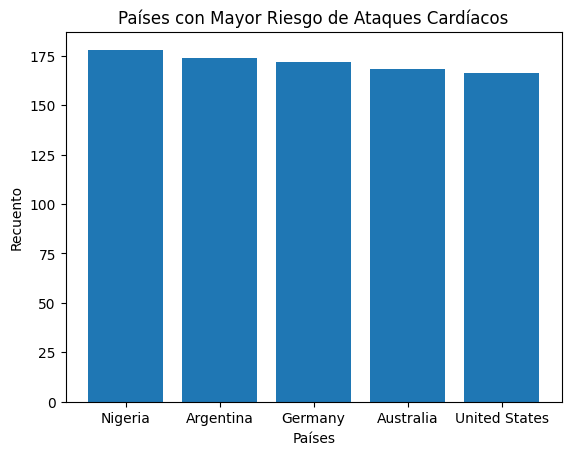

In [48]:
# Países con mayor Riesgo de Ataques Cardíacos
# 1. contar la cantidad de paises totales para mostrar en 'Y'
# 2. sumar la cantidad de 'Riesgo de Ataque Cardíaco' por 'País'
# 3. mostrar los paises que tienen mayores valores en un top 5

count_country = hap["País"].value_counts()
sum_har = hap.groupby("País")["Riesgo de Ataque Cardíaco"].sum()
top_countries = sum_har.nlargest(5) # muestra el top 5 valores máx

plt.bar(top_countries.index,top_countries.values)
plt.xlabel("Países")
plt.ylabel("Recuento")
plt.title("Países con Mayor Riesgo de Ataques Cardíacos")
plt.show()

##### >> A partir del gráfico anterior, notamos que Argentina está en el 2do puesto de los países con mayor riesgo de ataques cardíacos. Vamos a seguir filtrando los datos a partir de Argentina para seguir analizando el resto de las variables

In [49]:
#Filtrar datos por país
data_arg = hap[hap['País'] == 'Argentina']

#Inspeccionar el subconjunto filtrado
print(data_arg.head())

   ID Paciente  Edad    Sexo  Colesterol Presión Arterial  Ritmo Cardíaco  \
0      BMW7812    67    Male         208           158/88              72   
30     SLE3369    27  Female         135           120/77              49   
36     IUJ5442    27  Female         263          127/109              83   
37     BSV5917    29  Female         201           134/60              86   
46     QWD3129    51    Male         197          106/106              79   

    Diabetes  Historial Familiar  Fumar  Obesidad  ...  \
0          0                   0      1         0  ...   
30         1                   1      0         0  ...   
36         0                   1      0         0  ...   
37         0                   0      0         1  ...   
46         1                   1      1         1  ...   

    Horas de Sedentarismo por Día  Ingreso        IMC  Triglicéridos  \
0                        6.615001   261404  31.251233            286   
30                       9.120329    71276  

In [50]:
#Descripción estadística en ARG
data_arg.describe()

,Edad,Colesterol,Ritmo Cardíaco,Diabetes,Historial Familiar,Fumar,Obesidad,Consumo de Alcohol,Horas de ejercicio por semana,Problemas Cardíacos Previos,Uso de Medicamentos,Nivel de Estrés,Horas de Sedentarismo por Día,Ingreso,IMC,Triglicéridos,Días de Actividad Física por Semana,Horas de Sueño por Día,Riesgo de Ataque Cardíaco
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,54.180467,261.520170,75.171975,0.660297,0.494692,0.889597,0.498938,0.600849,9.861363,0.498938,0.496815,5.681529,5.983200,156881.218684,28.794898,419.785563,3.316348,6.959660,0.369427
std,21.522361,83.564341,20.950147,0.474112,0.500503,0.313725,0.500531,0.490245,5.952086,0.500531,0.500521,2.911543,3.482652,82368.129808,6.489604,222.669363,2.271874,1.948395,0.483163
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116248,0.000000,0.000000,1.000000,0.068494,21070.000000,18.013606,30.000000,0.000000,4.000000,0.000000
25%,37.000000,189.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.150993,0.000000,0.000000,3.000000,2.988382,83734.500000,22.843949,227.000000,1.000000,5.000000,0.000000
50%,54.000000,260.000000,76.000000,1.000000,0.000000,1.000000,0.000000,1.000000,9.568401,0.000000,0.000000,6.000000,6.167012,152198.000000,28.892801,407.000000,3.000000,7.000000,0.000000
75%,74.000000,337.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.373563,1.000000,1.000000,8.000000,9.074486,229337.500000,34.112459,617.500000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.839162,1.000000,1.000000,10.000000,11.989217,299428.000000,39.989915,797.000000,7.000000,10.000000,1.000000


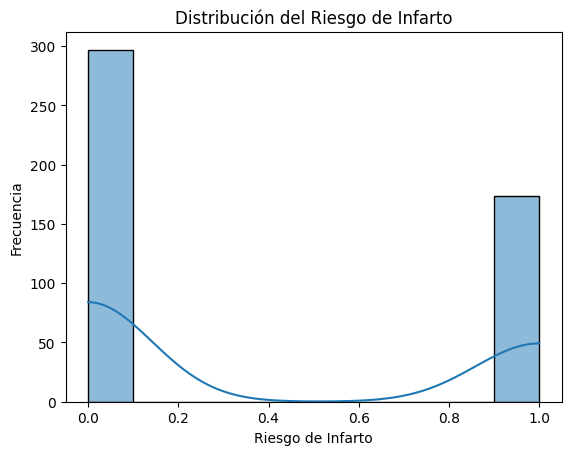

In [51]:
# Visualización de la distribución del riesgo de infarto
sns.histplot(data_arg['Riesgo de Ataque Cardíaco'], kde=True)
plt.title('Distribución del Riesgo de Infarto')
plt.xlabel('Riesgo de Infarto')
plt.ylabel('Frecuencia')
plt.show()